#### Topic: IMAGE DENOISING USING CNN AUTOENCODER

In [105]:
'''
0 -> t-shirt
1 -> trouser
2 -> pullover
3 -> dress
4 -> coat
5 -> sandal
6 -> shirt
7 -> sneaker
8 -> bag
9 -> ankle boot
'''

'\n0 -> t-shirt\n1 -> trouser\n2 -> pullover\n3 -> dress\n4 -> coat\n5 -> sandal\n6 -> shirt\n7 -> sneaker\n8 -> bag\n9 -> ankle boot\n'

In [106]:
# import libraries and dataset

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [107]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

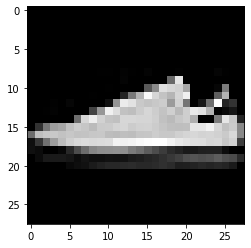

In [108]:
plt.imshow(x_train[6], cmap='gray')

In [109]:
x_train.shape

(60000, 28, 28)

In [110]:
x_test.shape

(10000, 28, 28)

In [111]:
y_train.shape

(60000,)

In [112]:
y_test.shape

(10000,)

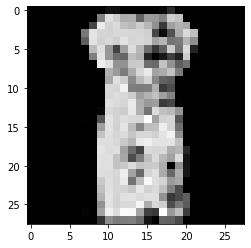

In [113]:
# visualisation

# choose a img from train dataset at random
i = random.randint(1,60000)
plt.imshow(x_train[i], cmap='gray')

In [114]:
label = y_train[i]
label

3

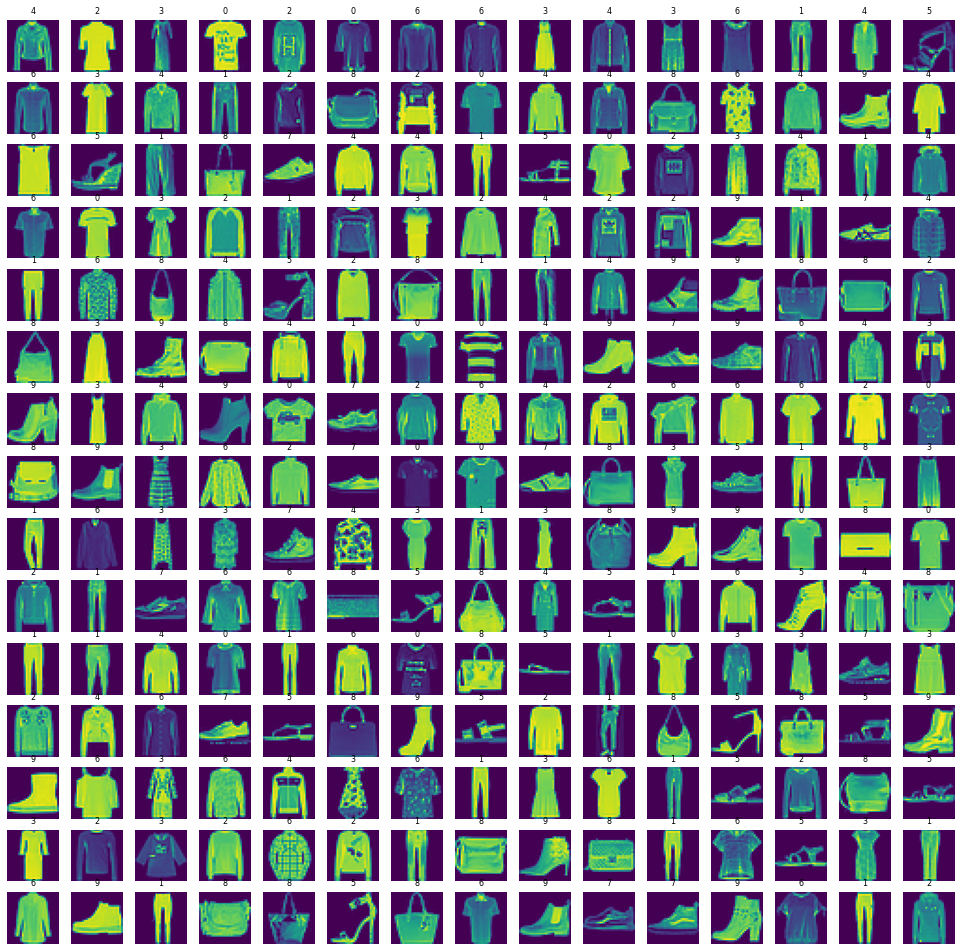

In [115]:
# creating a grid output for abpve cmd

# show imgs from df in a 15x15 grid
w_grid = 15
l_grid = 15

# 17x17 (size) similar to canvas to plot a 15x15 grid
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))

# flaten the 15x15 grid into 255 array
axes = axes.ravel()

# get the len of the training df
n_training = len(x_train)

# select a random no. from 0 to n_training i.e between 0 to 60000
for i in np.arange(0, w_grid*l_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')


In [116]:
# perform data preprocessing 

In [117]:
# normalize data

# the data is in gray scale
# i.e it ranges from 0 to 255
# we are converting it betweek 0 to 1

x_train = x_train/255
x_test = x_test/255

In [118]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [119]:
# add noise to the train df

# declare the noise factor co-eff
noise_factor = 0.1

noisy_train_mnist = []

for img in x_train:
  noisy_image = img + noise_factor*np.random.randn(*img.shape)

  # above cmd may result in value >1 or <0 
  # use clip fn so that 0 <= value <= 1
  noisy_image = np.clip(noisy_image, 0, 1)

  # append the noisy_image to the noisy df
  noisy_train_mnist.append(noisy_image)


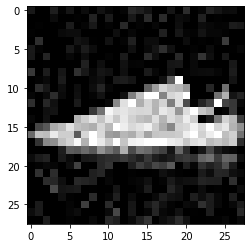

In [120]:
plt.imshow(noisy_train_mnist[6], cmap='gray')

In [121]:
noisy_train_mnist = np.array(noisy_train_mnist)

In [122]:
# add noise to the test df

# declare the noise factor co-eff
noise_factor = 0.1

noisy_test_mnist = []

for img in x_test:
  noisy_image = img + noise_factor*np.random.randn(*img.shape)

  # above cmd may result in value >1 or <0 
  # use clip fn so that 0 <= value <= 1
  noisy_image = np.clip(noisy_image, 0, 1)

  # append the noisy_image to the noisy df
  noisy_test_mnist.append(noisy_image)


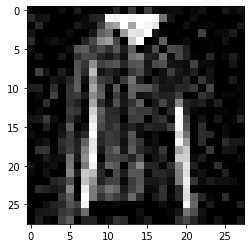

In [123]:
plt.imshow(noisy_test_mnist[6], cmap='gray')

In [124]:
noisy_test_mnist = np.array(noisy_test_mnist)

In [125]:
# build an autoencoder
# using keras
# and tf as backend

autoencoder = tf.keras.models.Sequential()

# encoder
autoencoder.add(tf.keras.layers.Conv2D(
                  filters = 16,
                  kernel_size = 3,
                  strides = 2,          # skip 2 strides 
                  padding = 'same',
                  input_shape = (28,28,1)
                ))

autoencoder.add(tf.keras.layers.Conv2D(
                  filters = 8,
                  kernel_size = 3,
                  strides = 2,          # skip 2 strides 
                  padding = 'same',
                ))

autoencoder.add(tf.keras.layers.Conv2D(
                  filters = 8,
                  kernel_size = 3,
                  strides = 1,         
                  padding = 'same',
                ))

# decoder 
autoencoder.add(tf.keras.layers.Conv2DTranspose(
                  filters = 16,
                  kernel_size = 3,
                  strides = 2,          # skip 2 strides 
                  padding = 'same',
                ))

autoencoder.add(tf.keras.layers.Conv2DTranspose(
                  filters = 1,
                  kernel_size = 3,
                  strides = 2,          # skip 2 strides 
                  activation = 'sigmoid',
                  padding = 'same',
                ))

In [126]:
autoencoder.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.001)    # lr -> learning rate of 0.001
)
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [127]:
autoencoder.fit(
    noisy_train_mnist.reshape(-1,28,28,1),
    x_train.reshape(-1,28,28,1),
    epochs = 10,
    batch_size = 200,
    validation_data = (noisy_train_mnist.reshape(-1,28,28,1), x_train.reshape(-1,28,28,1)))

Epoch 1/10
300/300 [==============================] - 20s 67ms/step - loss: 0.3855 - val_loss: 0.3087
Epoch 2/10
300/300 [==============================] - 21s 69ms/step - loss: 0.3005 - val_loss: 0.2951
Epoch 3/10
300/300 [==============================] - 21s 70ms/step - loss: 0.2920 - val_loss: 0.2892
Epoch 4/10
300/300 [==============================] - 20s 67ms/step - loss: 0.2871 - val_loss: 0.2852
Epoch 5/10
300/300 [==============================] - 20s 67ms/step - loss: 0.2835 - val_loss: 0.2820
Epoch 6/10
300/300 [==============================] - 20s 68ms/step - loss: 0.2807 - val_loss: 0.2798
Epoch 7/10
300/300 [==============================] - 20s 67ms/step - loss: 0.2790 - val_loss: 0.2784
Epoch 8/10
300/300 [==============================] - 20s 68ms/step - loss: 0.2780 - val_loss: 0.2776
Epoch 9/10
300/300 [==============================] - 20s 68ms/step - loss: 0.2773 - val_loss: 0.2769
Epoch 10/10
300/300 [==============================] - 20s 68ms/step - loss: 0.276

In [128]:
# evaluation of trained model

In [129]:
evaluation = autoencoder.evaluate(
    noisy_train_mnist.reshape(-1,28,28,1),
    x_train.reshape(-1,28,28,1)
)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.2763


In [130]:
predicted = autoencoder.predict(noisy_train_mnist[:10].reshape(-1, 28, 28, 1))

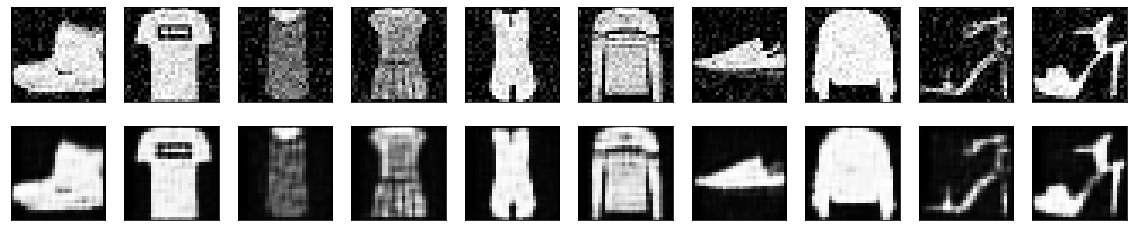

In [131]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, 
               sharex = True, sharey = True,
               figsize = (20,4))
for images, row in zip([noisy_train_mnist[:10], predicted], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [132]:
# testing model on noisy_test_mnist

In [133]:
autoencoder.fit(
    noisy_test_mnist.reshape(-1,28,28,1),
    x_test.reshape(-1,28,28,1),
    epochs = 20,
    batch_size = 200,
    validation_data = (noisy_test_mnist.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)))

Epoch 1/20
50/50 [==============================] - 3s 67ms/step - loss: 0.2784 - val_loss: 0.2784
Epoch 2/20
50/50 [==============================] - 3s 65ms/step - loss: 0.2783 - val_loss: 0.2782
Epoch 3/20
50/50 [==============================] - 3s 66ms/step - loss: 0.2782 - val_loss: 0.2782
Epoch 4/20
50/50 [==============================] - 3s 66ms/step - loss: 0.2781 - val_loss: 0.2780
Epoch 5/20
50/50 [==============================] - 3s 64ms/step - loss: 0.2780 - val_loss: 0.2780
Epoch 6/20
50/50 [==============================] - 3s 65ms/step - loss: 0.2779 - val_loss: 0.2778
Epoch 7/20
50/50 [==============================] - 3s 66ms/step - loss: 0.2778 - val_loss: 0.2777
Epoch 8/20
50/50 [==============================] - 3s 66ms/step - loss: 0.2778 - val_loss: 0.2777
Epoch 9/20
50/50 [==============================] - 3s 65ms/step - loss: 0.2776 - val_loss: 0.2776
Epoch 10/20
50/50 [==============================] - 3s 67ms/step - loss: 0.2776 - val_loss: 0.2775
Epoch 11/

In [134]:
evaluation = autoencoder.evaluate(
    noisy_test_mnist.reshape(-1,28,28,1),
    x_test.reshape(-1,28,28,1)
)

313/313 [==============================] - 2s 5ms/step - loss: 0.2769


In [135]:
predicted = autoencoder.predict(noisy_test_mnist[:10].reshape(-1, 28, 28, 1))

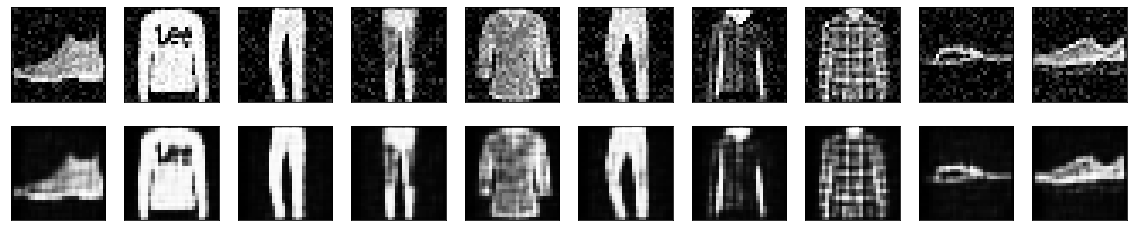

In [136]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, 
               sharex = True, sharey = True,
               figsize = (20,4))
for images, row in zip([noisy_test_mnist[:10], predicted], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)